# Requirements

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

# Laboratory Exercise - Run Mode (8 points)

## The Gym Dataset
The dataset contains detailed information on 973 gym members' workout sessions, including their exercise routines, physical attributes, and fitness metrics. The features include age, gender, weight, height, heart rate data (maxiumum BPM, average BPM, and resting BPM), session duration, calories burned, workout type, body fat percentage, water intake, workout frequency, and experience level. Each feature provides insights into different aspects of a gym member's workout habits, physical health, and overall fitness progression. These attributes, except for the 'burned calories', can be used as input variables for analysis and modeling. The 'burned calories' attribute serves as the target variable, representing the total calories burned during each workout session. This dataset offers a comprehensive set of features, making it ideal for exploring and understanding the factors that influence calorie burn during workouts.

Load the dataset into a `pandas` data frame.

In [2]:
data = pd.read_csv("data/gym_members_exercise_tracking.csv")
data.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [3]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Preprocess the input and the output variables appropriately.

In [4]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
data.Workout_Type.unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
encoder = LabelEncoder()
encoded_data_g = encoder.fit_transform(data['Gender'])
data['Gender'] = encoded_data_g
encoded_data_w = encoder.fit_transform(data['Workout_Type'])
data['Workout_Type'] = encoded_data_w

In [8]:
data.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

Explore the dataset using visualizations of your choice.

In [9]:
data.describe()

Age      Gender  Weight (kg)  Height (m)     Max_BPM  \
count  973.000000  973.000000   973.000000   973.00000  973.000000   
mean    38.683453    0.525180    73.854676     1.72258  179.883864   
std     12.180928    0.499622    21.207500     0.12772   11.525686   
min     18.000000    0.000000    40.000000     1.50000  160.000000   
25%     28.000000    0.000000    58.100000     1.62000  170.000000   
50%     40.000000    1.000000    70.000000     1.71000  180.000000   
75%     49.000000    1.000000    86.000000     1.80000  190.000000   
max     59.000000    1.000000   129.900000     2.00000  199.000000   

          Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  973.000000   973.000000                973.000000       973.000000   
mean   143.766701    62.223022                  1.256423       905.422405   
std     14.345101     7.327060                  0.343033       272.641516   
min    120.000000    50.000000                  0.500000       303.000000   
25%    131.000000    56.000000                  1.040000       720.000000   
50%    143.000000    62.000000                  1.260000       893.000000   
75%    156.000000    68.000000                  1.460000      1076.000000   
max    169.000000    74.000000                  2.000000      1783.000000   

       Workout_Type  Fat_Percentage  Water_Intake (liters)  \
count    973.000000      973.000000             973.000000   
mean       1.494347       24.976773               2.626619   
std        1.125472        6.259419               0.600172   
min        0.000000       10.000000               1.500000   
25%        0.000000       21.300000               2.200000   
50%        2.000000       26.200000               2.600000   
75%        2.000000       29.300000               3.100000   
max        3.000000       35.000000               3.700000   

       Workout_Frequency (days/week)  Experience_Level         BMI  
count                     973.000000        973.000000  973.000000  
mean                        3.321686          1.809866   24.912127  
std                         0.913047          0.739693    6.660879  
min                         2.000000          1.000000   12.320000  
25%                         3.000000          1.000000   20.110000  
50%                         3.000000          2.000000   24.160000  
75%                         4.000000          2.000000   28.560000  
max                         5.000000          3.000000   49.840000

In [10]:
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

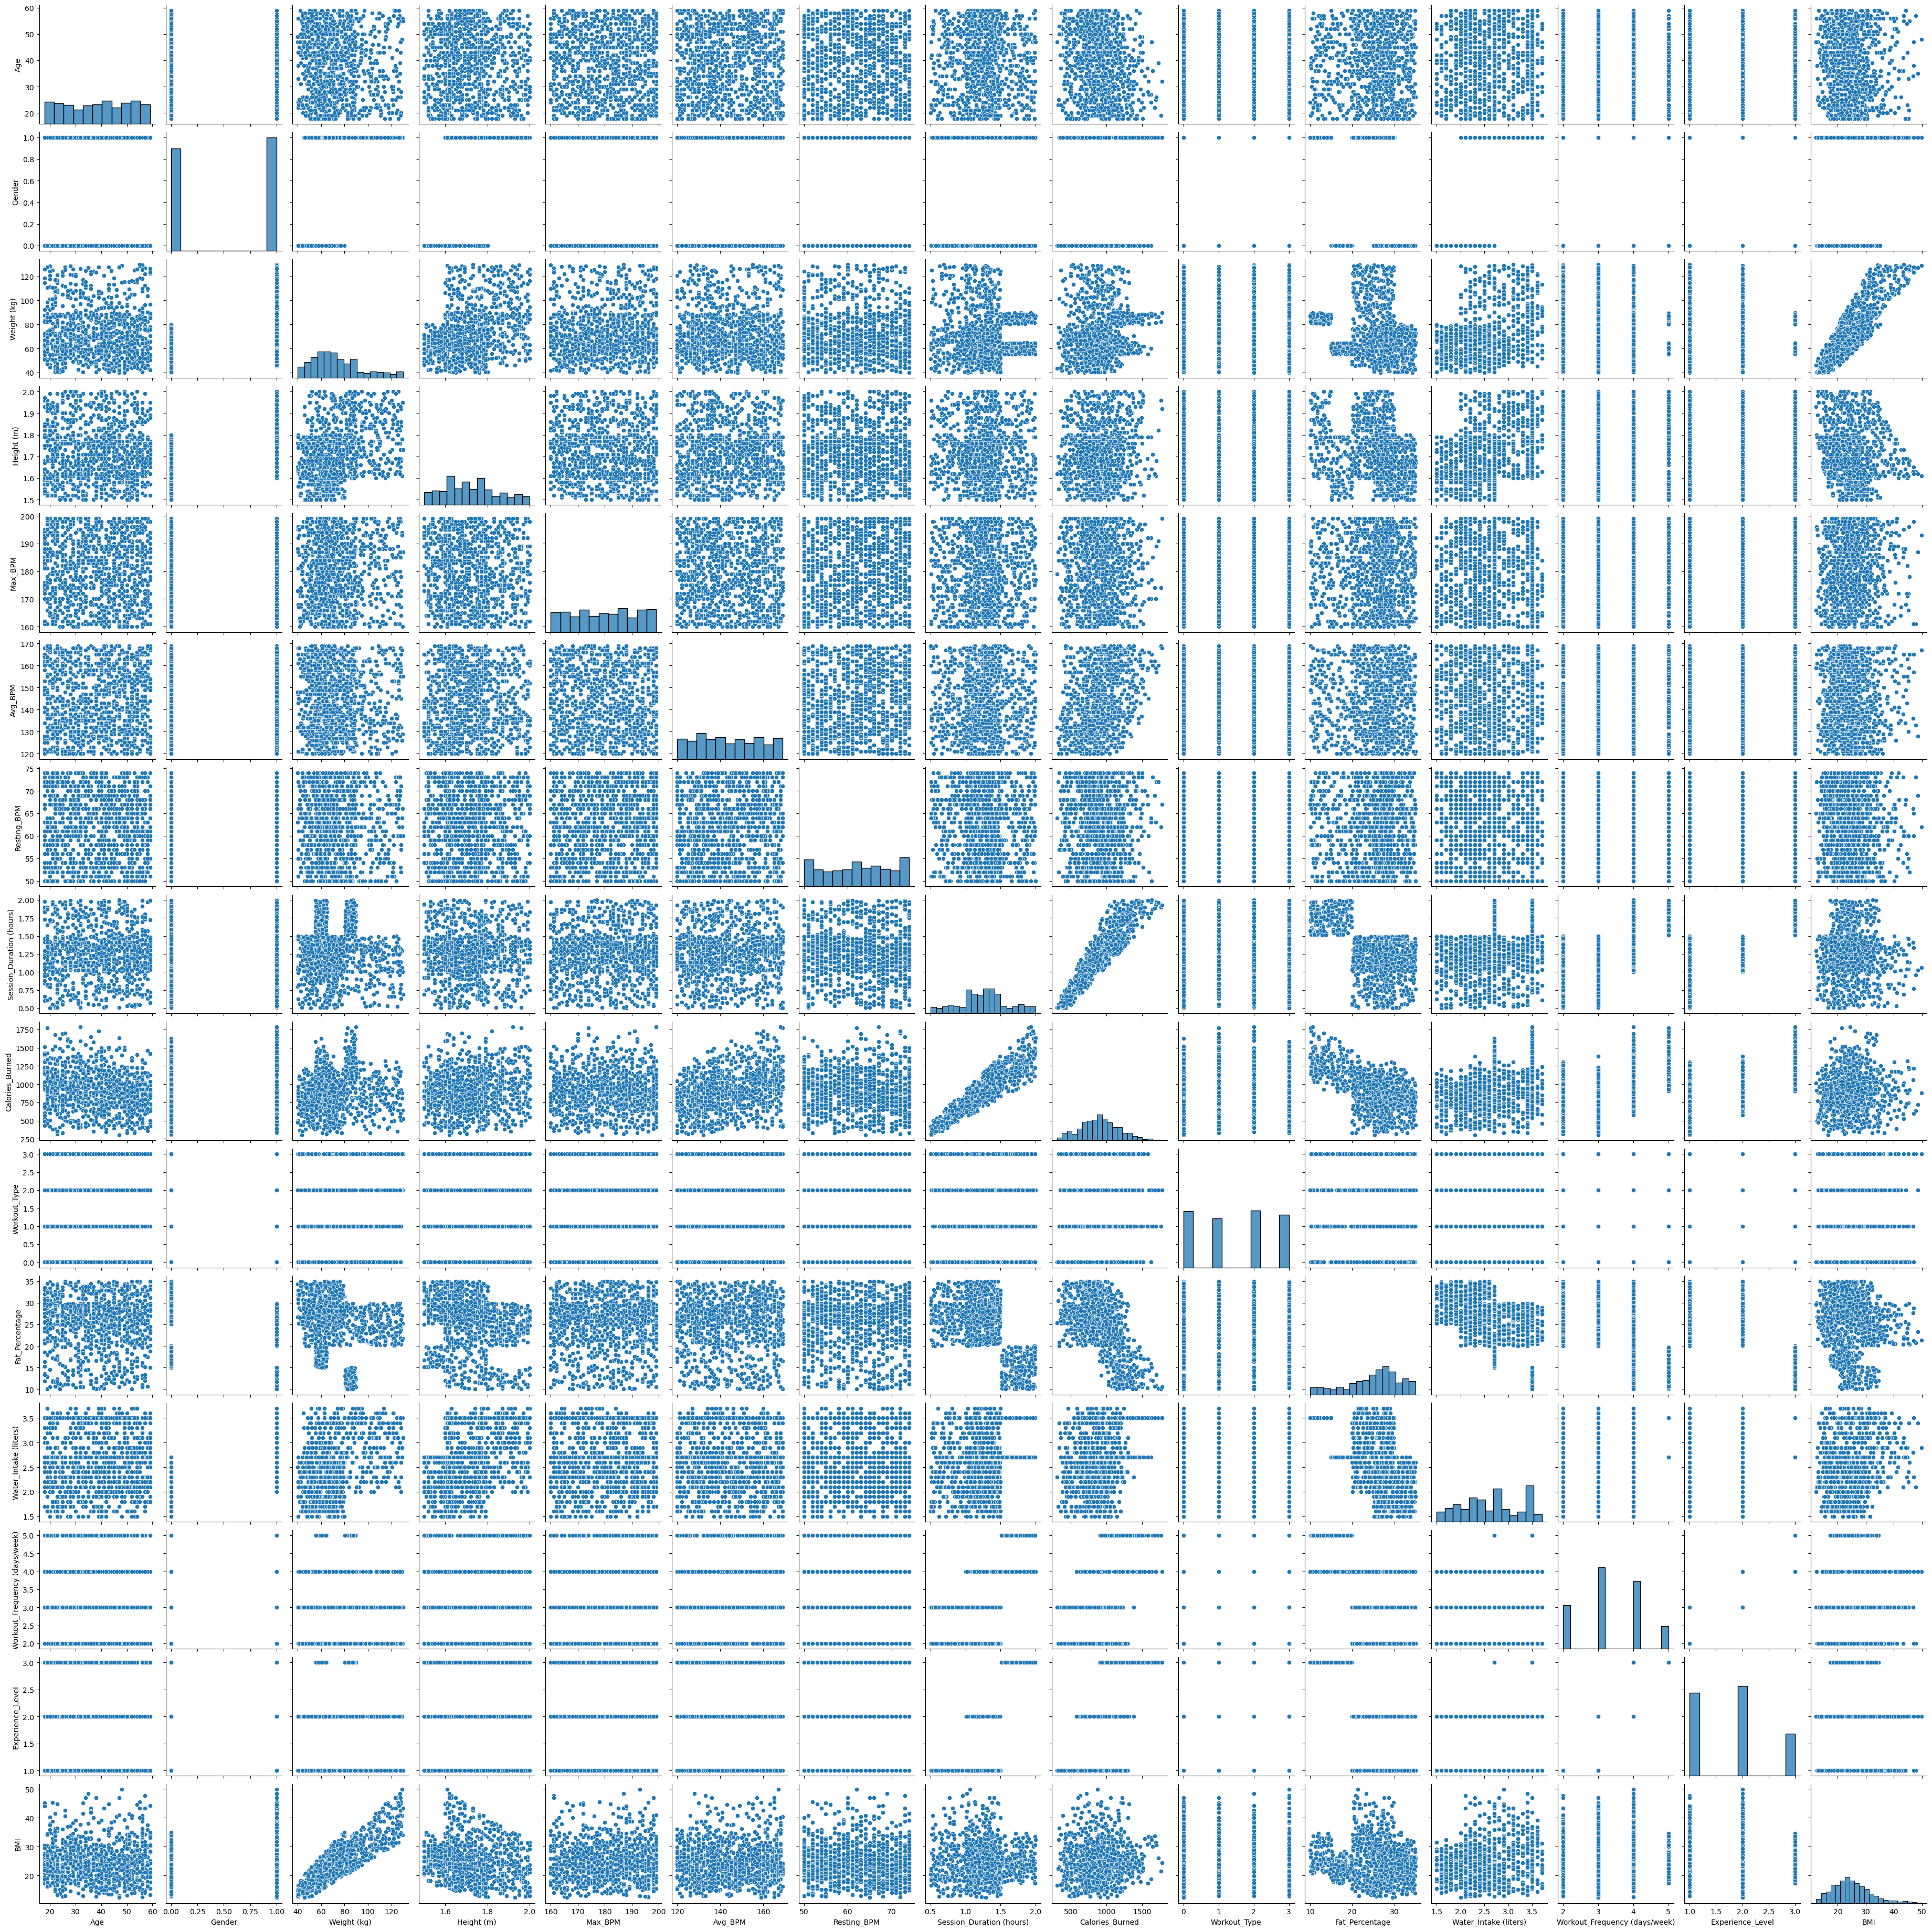

In [30]:
sns.pairplot(data)

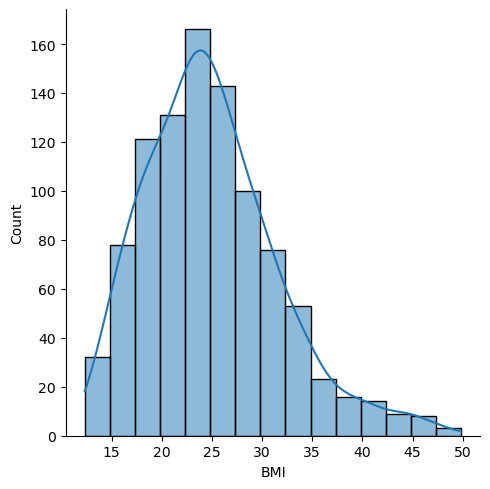

In [11]:
sns.displot(data['BMI'], kde=True, bins=15)
plt.show()

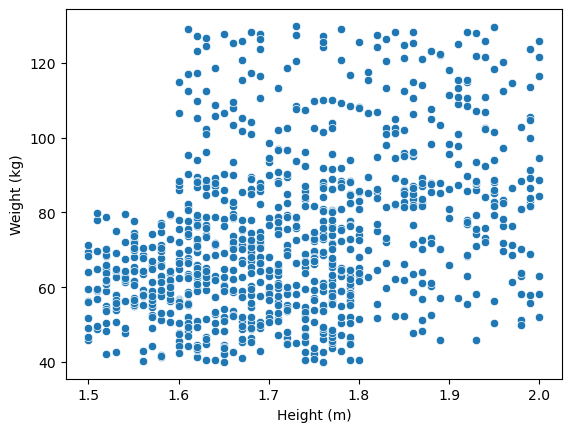

In [12]:
sns.scatterplot(data=data, x='Height (m)', y='Weight (kg)')
plt.show()

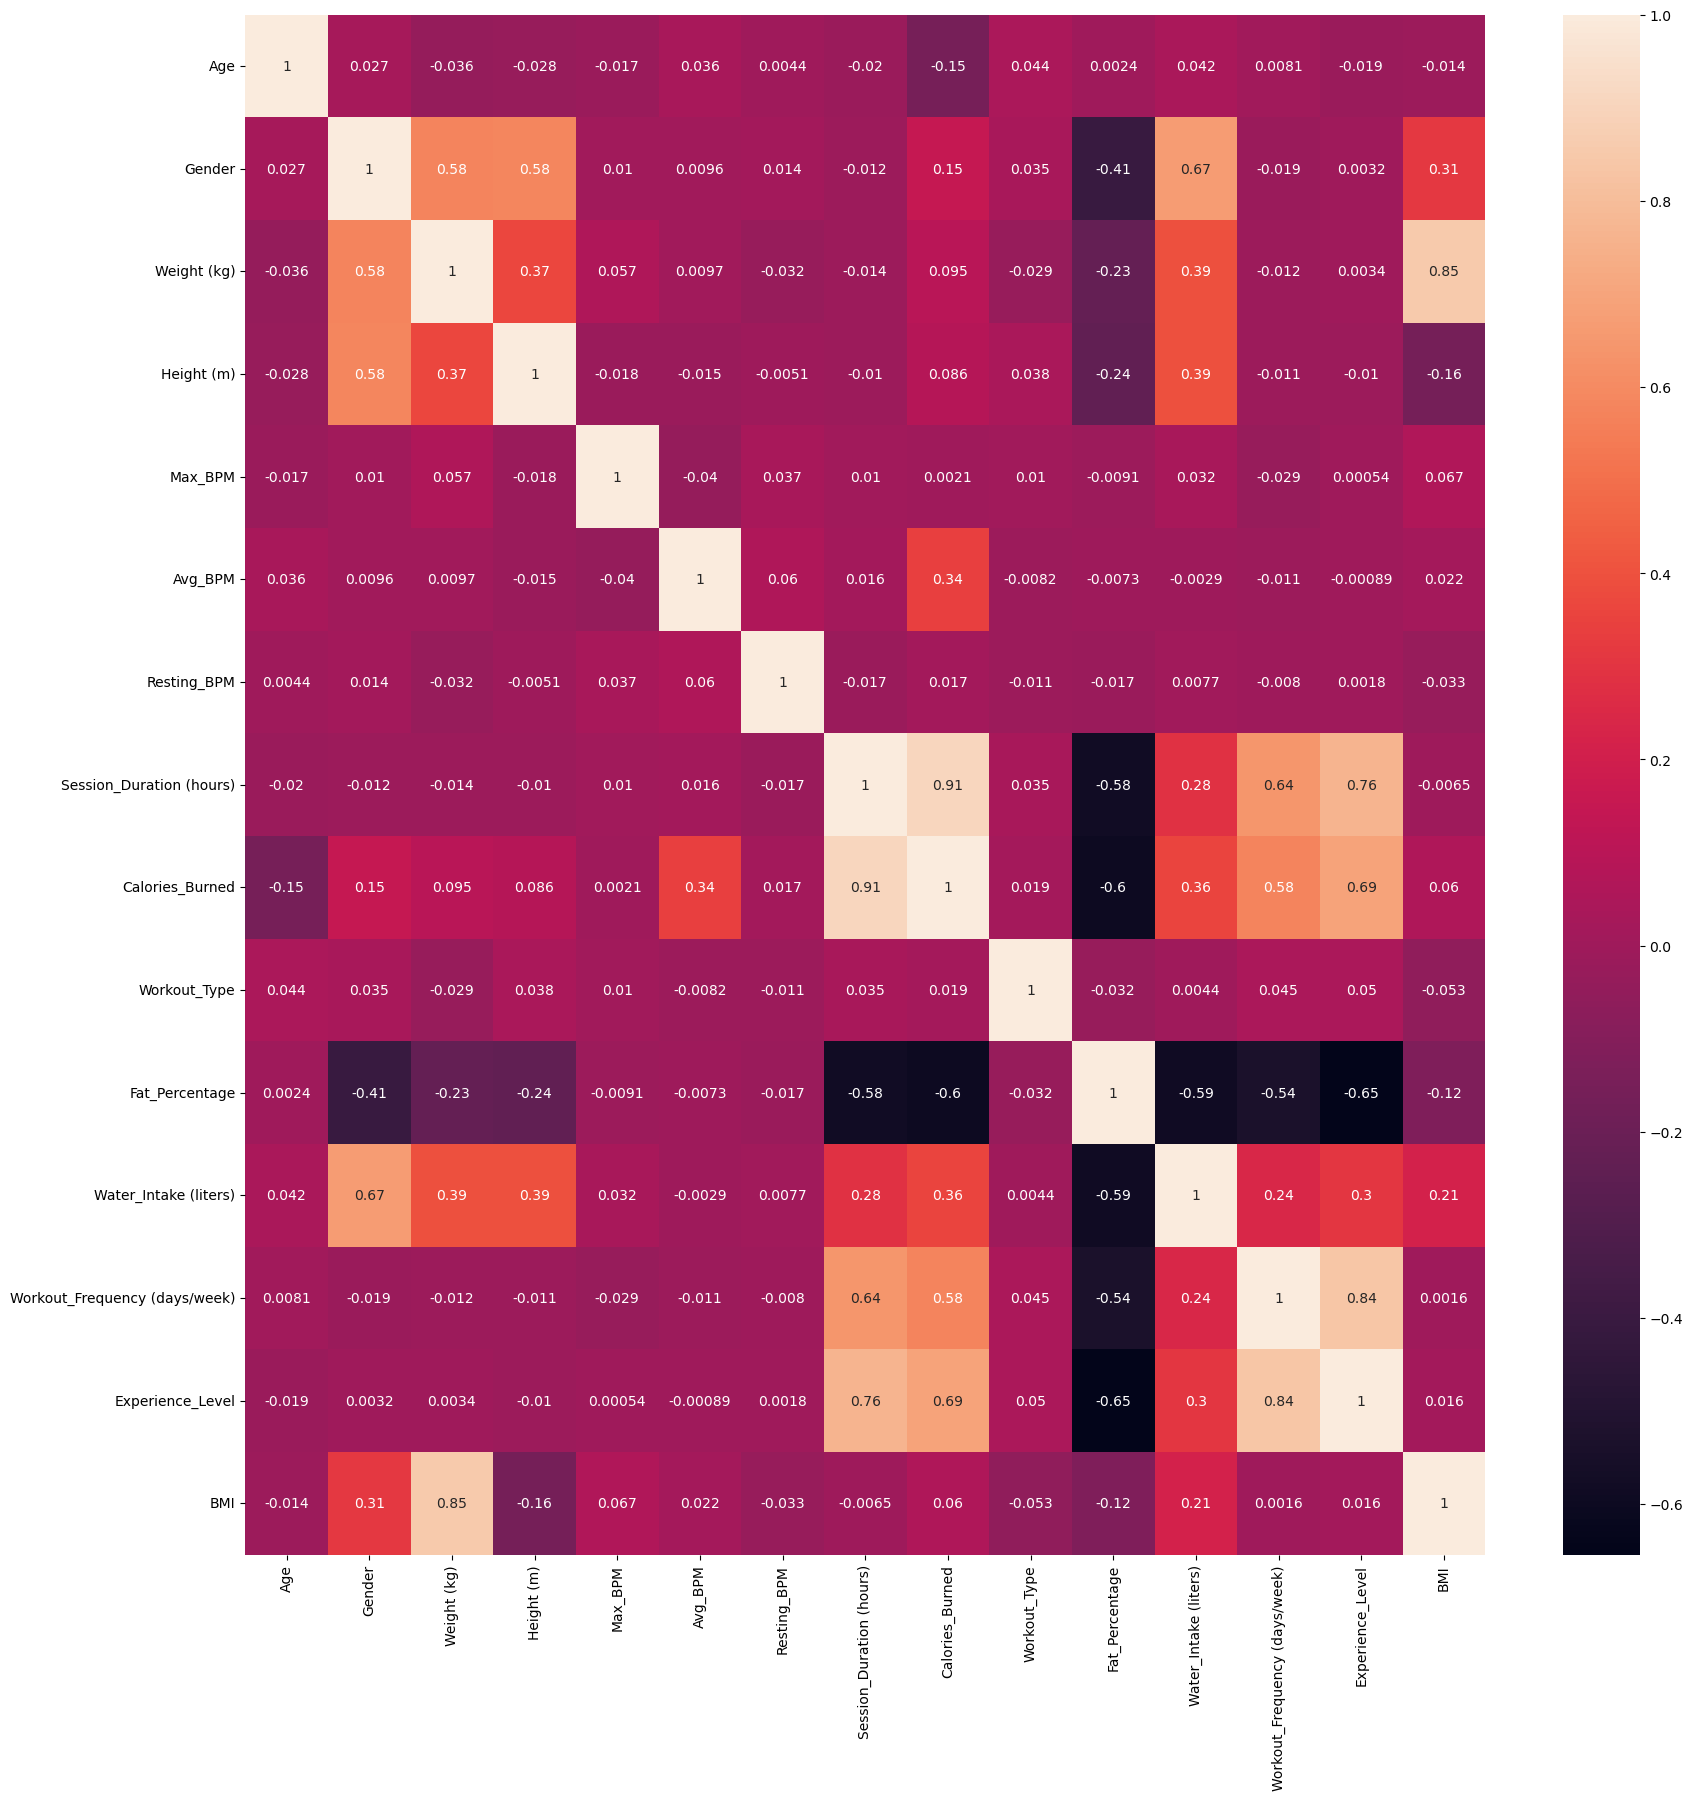

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

Check if the dataset is balanced.

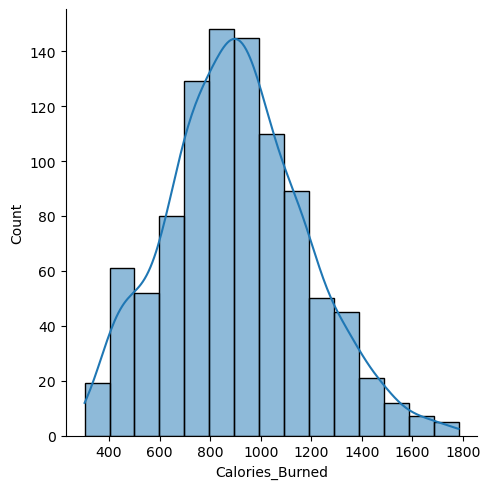

In [14]:
sns.displot(data['Calories_Burned'], kde=True, bins=15)
plt.show()

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [28]:
X = data.drop(['Calories_Burned'],axis=1)
Y = data.Calories_Burned

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [33]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [34]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [37]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print(r2_score(y_pred,Y_test))

Mean Absolute Error : 8.023404048160112
0.9005279463836973


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [41]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.2],
    'max_depth': [3, 7, 10],
}
grid = GridSearchCV(model,params)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.2],
                         'max_depth': [3, 7, 10], 'n_estimators': [100, 200]})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [43]:
y_pred = grid.best_estimator_.predict(X_test)
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print(r2_score(y_pred,Y_test))

Mean Absolute Error : 5.142988415208306
0.9824723253981704
